## Scaling Numeric Data Exercises

Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice. 

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import sklearn.preprocessing

import matplotlib.pyplot as plt

import wrangle

In [2]:
telcodf = wrangle.wrangle_telco()
telcodf.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.80
2,0016-QLJIS,90.45,65,5957.90
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [3]:
train, validate, test = wrangle.split_telco(telcodf)
train.shape, validate.shape, test.shape

((949, 4), (407, 4), (339, 4))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 949 entries, 1063 to 1216
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      949 non-null    object 
 1   monthly_charges  949 non-null    float64
 2   tenure           949 non-null    int64  
 3   total_charges    949 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 37.1+ KB


1. Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

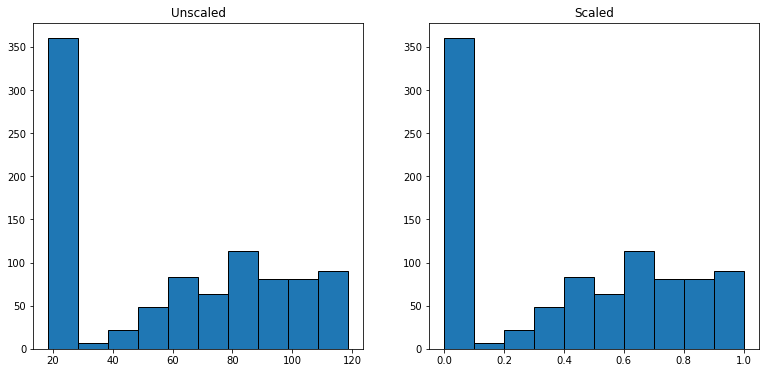

In [5]:
scaler_minmax = sklearn.preprocessing.MinMaxScaler()

scaler_minmax.fit(train[['monthly_charges']])

train['monthly_charges_scaled'] = scaler_minmax.transform(train[['monthly_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, ec='black')
plt.title('Unscaled')
plt.subplot(122)
plt.hist(train.monthly_charges_scaled, ec='black')
plt.title('Scaled')
plt.show()

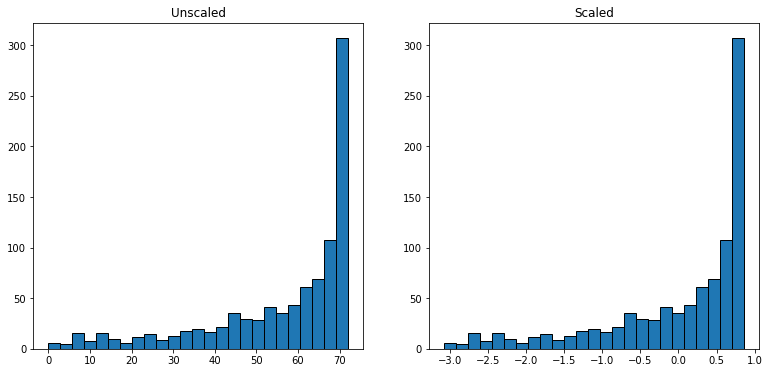

In [6]:
scaler_standard = sklearn.preprocessing.StandardScaler()

scaler_standard.fit(train[['tenure']])

train['tenure_scaled'] = scaler_standard.transform(train[['tenure']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Unscaled')
plt.subplot(122)
plt.hist(train.tenure_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

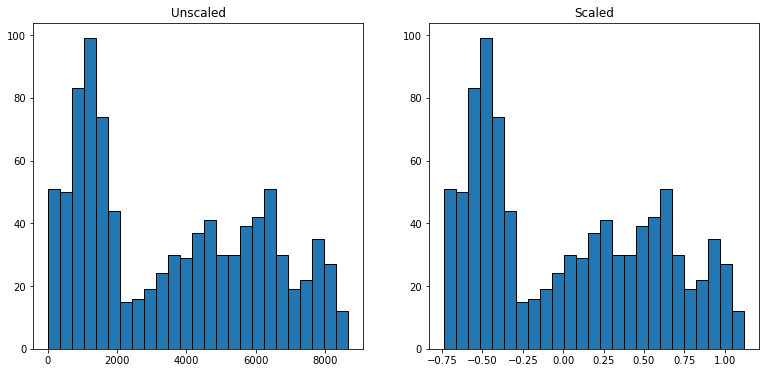

In [7]:
scaler_robust = sklearn.preprocessing.RobustScaler()

scaler_robust.fit(train[['total_charges']])

train['total_charges_scaled'] = scaler_robust.transform(train[['total_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Unscaled')
plt.subplot(122)
plt.hist(train.total_charges_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.show()

2. Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [8]:
train['monthly_charges_inverse'] = scaler_minmax.inverse_transform(train[['monthly_charges_scaled']])
train[['monthly_charges', 'monthly_charges_scaled', 'monthly_charges_inverse']].head()

,monthly_charges,monthly_charges_scaled,monthly_charges_inverse
1063,24.95,0.065337,24.95
1528,78.80,0.602494,78.80
1297,103.95,0.853367,103.95
1676,53.50,0.350125,53.50
1583,24.35,0.059352,24.35


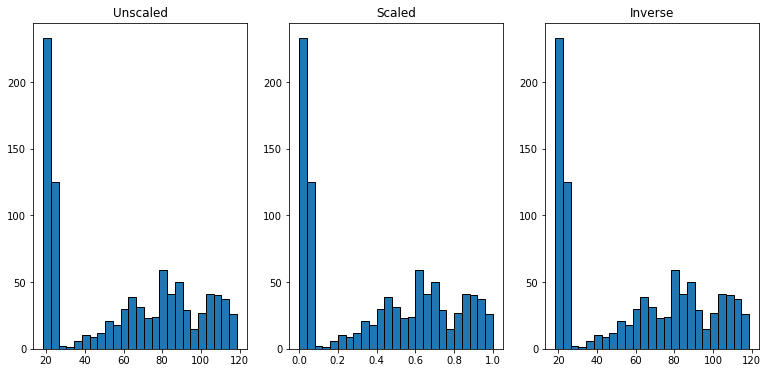

In [9]:
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train.monthly_charges, bins=25, ec='black')
plt.title('Unscaled')
plt.subplot(132)
plt.hist(train.monthly_charges_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.subplot(133)
plt.hist(train.monthly_charges_inverse, bins=25, ec='black')
plt.title('Inverse')
plt.show()

In [10]:
train['tenure_inverse'] = scaler_standard.inverse_transform(train[['tenure_scaled']])
train[['tenure', 'tenure_scaled', 'tenure_inverse']].head()

,tenure,tenure_scaled,tenure_inverse
1063,51,-0.291464,51.0
1528,43,-0.728948,43.0
1297,72,0.856932,72.0
1676,65,0.474133,65.0
1583,71,0.802246,71.0


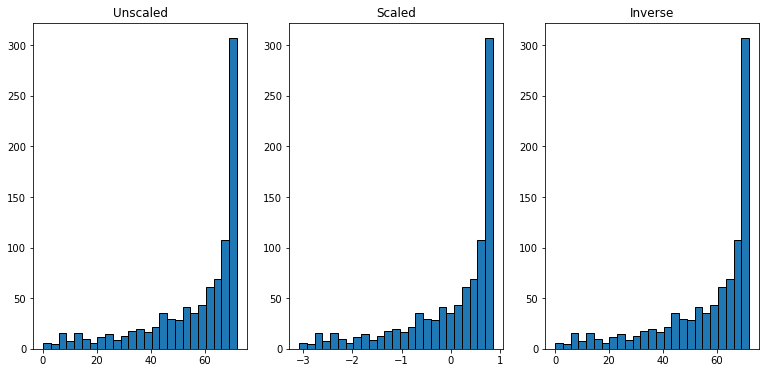

In [11]:
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train.tenure, bins=25, ec='black')
plt.title('Unscaled')
plt.subplot(132)
plt.hist(train.tenure_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.subplot(133)
plt.hist(train.tenure_inverse, bins=25, ec='black')
plt.title('Inverse')
plt.show()

In [12]:
train['total_charges_inverse'] = scaler_robust.inverse_transform(train[['total_charges_scaled']])
train[['total_charges', 'total_charges_scaled', 'total_charges_inverse']].head()

,total_charges,total_charges_scaled,total_charges_inverse
1063,1288.0,-0.466178,1288.0
1528,3460.3,-0.000139,3460.3
1297,7556.9,0.878733,7556.9
1676,3517.9,0.012218,3517.9
1583,1654.6,-0.387529,1654.6


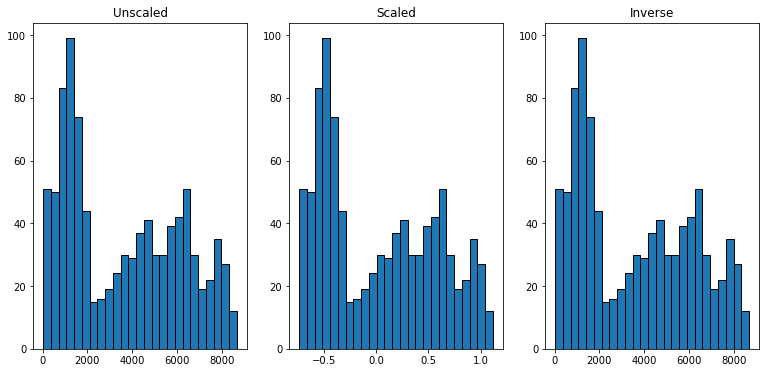

In [13]:
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train.total_charges, bins=25, ec='black')
plt.title('Unscaled')
plt.subplot(132)
plt.hist(train.total_charges_scaled, bins=25, ec='black')
plt.title('Scaled')
plt.subplot(133)
plt.hist(train.total_charges_inverse, bins=25, ec='black')
plt.title('Inverse')
plt.show()

3. Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (949). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


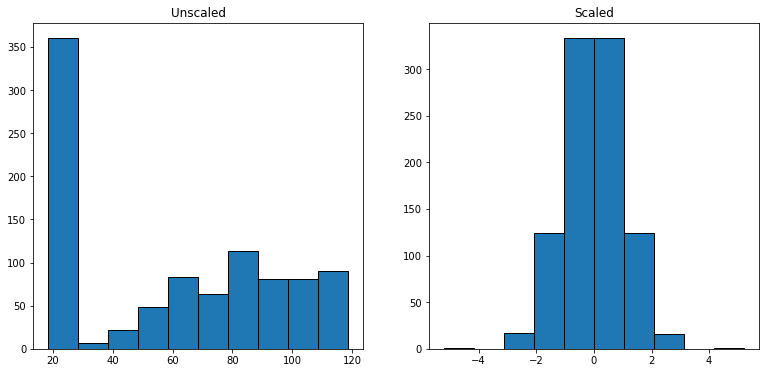

In [18]:
scaler_quant = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

scaler_quant.fit(train[['monthly_charges']])

train['monthly_charges_quant'] = scaler_quant.transform(train[['monthly_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(train.monthly_charges, ec='black')
plt.title('Unscaled')
plt.subplot(122)
plt.hist(train.monthly_charges_quant, ec='black')
plt.title('Scaled')
plt.show()

4. Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (949). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


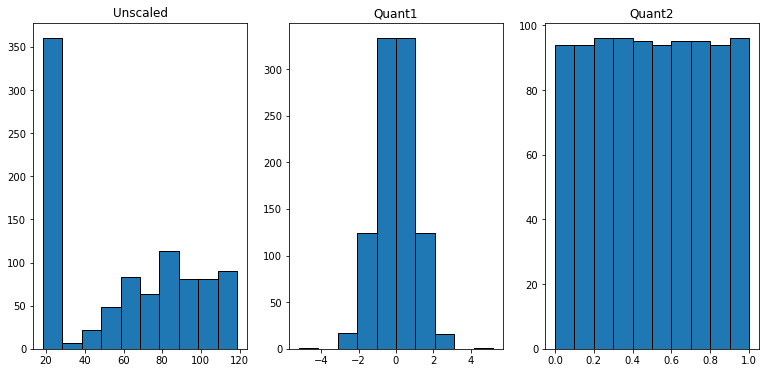

In [19]:
scaler_quant2 = sklearn.preprocessing.QuantileTransformer()

scaler_quant2.fit(train[['monthly_charges']])

train['monthly_charges_quant2'] = scaler_quant2.transform(train[['monthly_charges']])

plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train.monthly_charges, ec='black')
plt.title('Unscaled')
plt.subplot(132)
plt.hist(train.monthly_charges_quant, ec='black')
plt.title('Quant1')
plt.subplot(133)
plt.hist(train.monthly_charges_quant2, ec='black')
plt.title('Quant2')
plt.show()

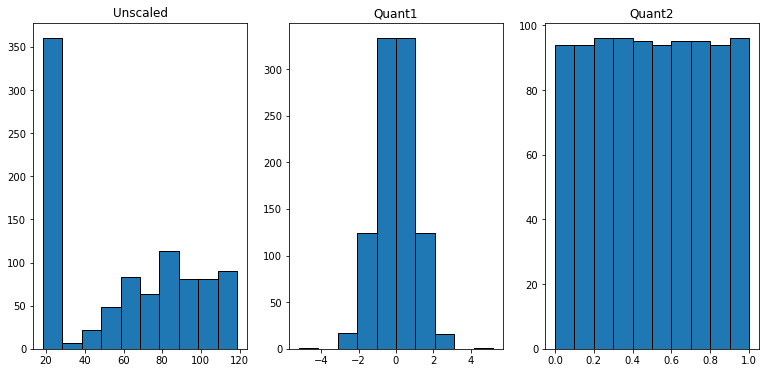

In [17]:
plt.figure(figsize=(13, 6))
plt.subplot(131)
plt.hist(train.monthly_charges, ec='black')
plt.title('Unscaled')
plt.subplot(132)
plt.hist(train.monthly_charges_quant, ec='black')
plt.title('Quant1')
plt.subplot(133)
plt.hist(train.monthly_charges_quant2, ec='black')
plt.title('Quant2')
plt.show()

5. Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!

In [20]:
def Min_Max_Scaler(X_train, X_validate, X_test):
    """
    Takes in X_train, X_validate and X_test dfs with numeric values only
    Returns scaler, X_train_scaled, X_validate_scaled, X_test_scaled dfs 
    """
    scaler = sklearn.preprocessing.MinMaxScaler().fit(X_train)
    X_train_scaled = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
    X_validate_scaled = pd.DataFrame(scaler.transform(X_validate), index = X_validate.index, columns = X_validate.columns)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
    
    return scaler, X_train_scaled, X_validate_scaled, X_test_scaled

In [21]:
X_train = train[['monthly_charges', 'tenure', 'total_charges']]
X_validate = validate[['monthly_charges', 'tenure', 'total_charges']]
X_test = test[['monthly_charges', 'tenure', 'total_charges']]

In [22]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = Min_Max_Scaler(X_train, X_validate, X_test)

X_train_scaled.head()

,monthly_charges,tenure,total_charges
1063,0.065337,0.708333,0.146563
1528,0.602494,0.597222,0.397701
1297,0.853367,1.000000,0.871304
1676,0.350125,0.902778,0.404360
1583,0.059352,0.986111,0.188945
